In [12]:
import matplotlib.pyplot as plt
import cv2

[INFO] applying small_blur kernel


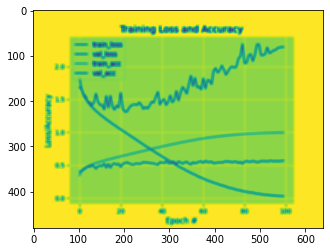

In [19]:
# python3 convolutions.py --image ../keras/output/keras_cifar10.png

import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2


def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kh, kW) = kernel.shape[:2]

    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad: y + pad + 1, x - pad: x + pad + 1]

            k = (roi * kernel).sum()
            # what
            output[y-pad, x-pad] = k
    
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    return output

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="path to the input image")
# args = vars(ap.parse_args())

smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0,-1, 0]), dtype="int")

laplacian = np.array((
    [0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]), dtype="int")



sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

sobelX = sobelY.T

kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

# image = cv2.imread(args["image"])
image = cv2.imread("../keras/output/keras_cifar10.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for(kernelName, kernel) in kernelBank:
    print("[INFO] applying {} kernel".format(kernelName))
    convolveOutput = convolve(gray, kernel)
    opencvOutput = cv2.filter2D(gray, -1, kernel)
    
    plt.figure()
    plt.imshow(gray)
    plt.imshow(convolveOutput)
    plt.imshow(opencvOutput)
    break
    # "{} - convolve".format(kernelName), 
    # "{} - opencv".format(kernelName), 